In [1]:
import pandas as pd
import yfinance as yf
from pyhrp.hrp import dist, linkage, tree, _hrp
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
nasdaq_100=pd.read_csv("C:/Users/91911/Downloads/nasdaq 100.csv",index_col=0,header=0)
nasdaq_100.sort_values(by=['MARKET CAP'],inplace=True,ascending=False)
nasdaq_20=nasdaq_100.head(20)
assets=nasdaq_20.index
from datetime import datetime
st='2015-08-01'
today='2020-08-20'
df=pd.DataFrame()
for stock in assets:
    ticker=yf.Ticker(stock)
    df[stock]=ticker.history(start=st, end=today, period='M')['Close']
monthly_rets=df
monthly_rets=monthly_rets.dropna()
corr=monthly_rets.corr()
cov=monthly_rets.cov()
links = linkage(dist(corr.values), method='ward')
node = tree(links)
rootcluster = _hrp(node, cov)
def correlDist(corr):
    dist = ((1 - corr) / 2.)**.5  # distance matrix
    return dist
dist=correlDist(corr)
def getQuasiDiag(link):
    # Sort clustered items by distance
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]  # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)  # make space
        df0 = sortIx[sortIx >= numItems]  # find clusters
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]  # item 1
        df0 = pd.Series(link[j, 1], index=i + 1)
        sortIx = sortIx.append(df0)  # item 2
        sortIx = sortIx.sort_index()  # re-sort
        sortIx.index = range(sortIx.shape[0])  # re-index
    return sortIx.tolist()

C:\Users\91911\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


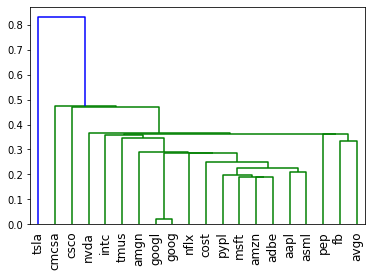

In [2]:
link = sch.linkage(dist, 'single')
dn = sch.dendrogram(link, labels=cov.index.values, leaf_rotation=90)
sortIx = getQuasiDiag(link)
sortIx = corr.index[sortIx].tolist()
corr_sort=corr.loc[sortIx][sortIx]


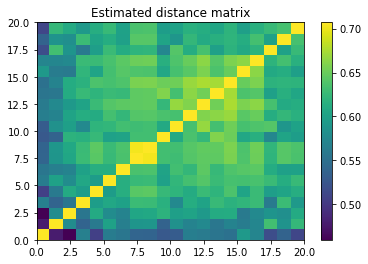

In [5]:
plt.figure()
plt.pcolormesh(correlDist(dist.loc[sortIx][sortIx]))
plt.colorbar()
plt.title('Estimated distance matrix')
plt.show()

In [6]:
l=[]
for i in range(5):
    l.append(assets[dn['leaves'][:5]][i])
print('The most unrelated stocks are-')
print(l)

The most unrelated stocks are-
['tsla', 'cmcsa', 'csco', 'nvda', 'intc']
